### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import json
import pulp as pl
import swifter

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk(r'G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\Epicurious - Recipes with Rating and Nutrition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\Epicurious - Recipes with Rating and Nutrition\epi_r.csv
G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\Epicurious - Recipes with Rating and Nutrition\full_format_recipes.json
G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\Epicurious - Recipes with Rating and Nutrition\recipe.py
G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\Epicurious - Recipes with Rating and Nutrition\utils.py


In [2]:
df = pd.read_csv(r'G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\Epicurious - Recipes with Rating and Nutrition\epi_r.csv')
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(20052, 680)

In [4]:
for i,j in enumerate(df.columns):
    print(f"{i} : {j}")

0 : title
1 : rating
2 : calories
3 : protein
4 : fat
5 : sodium
6 : #cakeweek
7 : #wasteless
8 : 22-minute meals
9 : 3-ingredient recipes
10 : 30 days of groceries
11 : advance prep required
12 : alabama
13 : alaska
14 : alcoholic
15 : almond
16 : amaretto
17 : anchovy
18 : anise
19 : anniversary
20 : anthony bourdain
21 : aperitif
22 : appetizer
23 : apple
24 : apple juice
25 : apricot
26 : arizona
27 : artichoke
28 : arugula
29 : asian pear
30 : asparagus
31 : aspen
32 : atlanta
33 : australia
34 : avocado
35 : back to school
36 : backyard bbq
37 : bacon
38 : bake
39 : banana
40 : barley
41 : basil
42 : bass
43 : bastille day
44 : bean
45 : beef
46 : beef rib
47 : beef shank
48 : beef tenderloin
49 : beer
50 : beet
51 : bell pepper
52 : berry
53 : beverly hills
54 : birthday
55 : biscuit
56 : bitters
57 : blackberry
58 : blender
59 : blue cheese
60 : blueberry
61 : boil
62 : bok choy
63 : bon appétit
64 : bon app��tit
65 : boston
66 : bourbon
67 : braise
68 : bran
69 : brandy
70 : b

In [5]:
with open (r'G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\Epicurious - Recipes with Rating and Nutrition\full_format_recipes.json', 'r') as f:
    full_recipe = json.load(f)

In [6]:
len(full_recipe)

20130

In [7]:
print(json.dumps(full_recipe[0:2], indent=2))

[
  {
    "directions": [
      "1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.",
      "2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.",
      "3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you."
    ],
    "fat": 7.0,
    "date": "2006-09-01T04:00:00.000Z",
    "categories": [
      "Sandwich",

#### Handling missing values

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [9]:
# Filter columns with null values
missing_cols_with_nulls = missing_values[missing_values > 0]
missing_cols_with_nulls

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

There are missing values in several columns:
- calories: 4117 missing values
- protein: 4162 missing values
- fat: 4183 missing values
- sodium: 4119 missing values

For these nutritional columns, we could either remove the rows with missing values or impute them using methods like mean, median, or more advanced techniques like KNN imputation.

In [10]:
# Impute missing values (using median)
for col in ['calories', 'protein', 'fat', 'sodium']:
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
df.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64

#### Remove Duplicate Rows

In [12]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
df = df.drop_duplicates()
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,331.0,8.0,17.0,294.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Check for inconsistencies

In [13]:
# Check for potential inconsistencies in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\
Unique values in {col}:")
    print(df[col].value_counts())

Unique values in title:
Chicken Stock                                  16
Pastry Dough                                   15
Turkey Giblet Stock                            11
Turkey Stock                                    8
Simple Syrup                                    8
                                               ..
Quinoa Risotto with Mushrooms and Thyme         1
Vegetable Latkes                                1
Fruit and Nut Strudel Cookies                   1
Frozen Passion Fruit Souffles                   1
Baked Ham with Marmalade-Horseradish Glaze      1
Name: title, Length: 17736, dtype: int64


The 'title' column contains recipe names, with some recipes appearing multiple times (e.g. "Pastry Dough" appears 28 times).<br>
The repeated titles might represent variations of the same recipe or data entry errors, thus further investigation may be needed to determine if there are unique recipes or duplicates.


Many columns appear to be binary (0 or 1), likely indicating the presence or absence of certain ingredients, cooking methods, or categories.<br>
These binary columns might represent recipe attributes or tags.

#### Handling outliers

In [14]:
# Check for potential outliers in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"\
Potential outliers in {col}: {outliers}")

Potential outliers in rating: 2394
Potential outliers in calories: 1530
Potential outliers in protein: 1831
Potential outliers in fat: 1823
Potential outliers in sodium: 1712
Potential outliers in #cakeweek: 6
Potential outliers in #wasteless: 1
Potential outliers in 22-minute meals: 17
Potential outliers in 3-ingredient recipes: 27
Potential outliers in 30 days of groceries: 7
Potential outliers in advance prep required: 103
Potential outliers in alabama: 3
Potential outliers in alaska: 2
Potential outliers in alcoholic: 823
Potential outliers in almond: 548
Potential outliers in amaretto: 37
Potential outliers in anchovy: 43
Potential outliers in anise: 103
Potential outliers in anniversary: 110
Potential outliers in anthony bourdain: 2
Potential outliers in aperitif: 12
Potential outliers in appetizer: 1315
Potential outliers in apple: 622
Potential outliers in apple juice: 6
Potential outliers in apricot: 247
Potential outliers in arizona: 8
Potential outliers in artichoke: 148
Pot

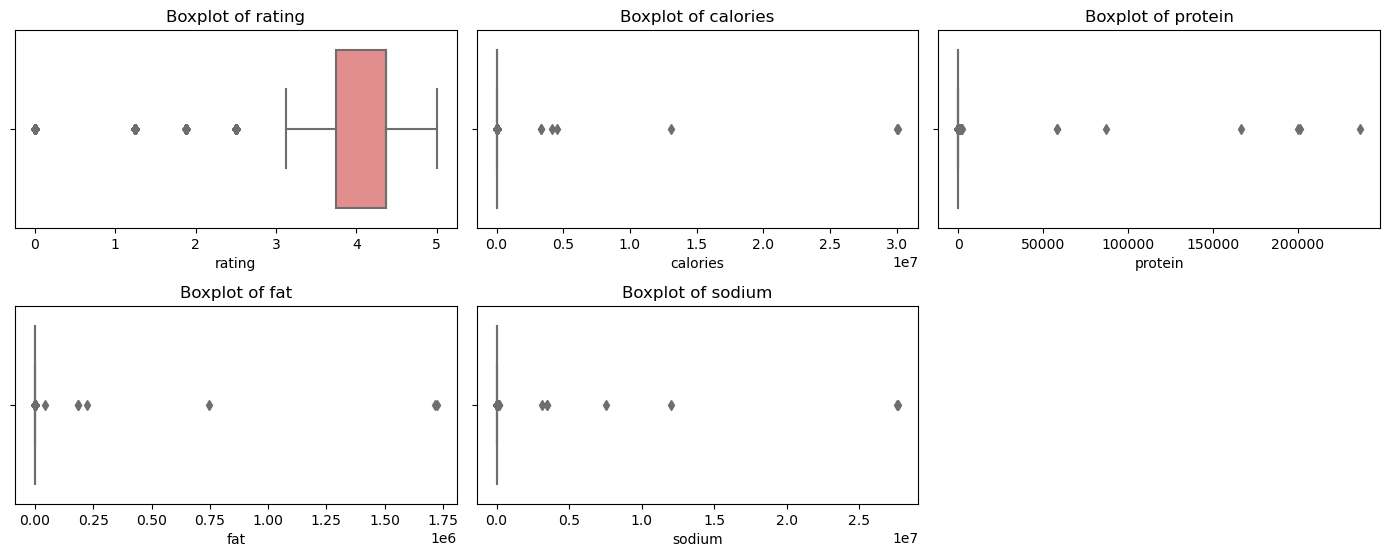

In [15]:
# Box Plot
numeric_cols = ['rating', 'calories', 'protein', 'fat', 'sodium']
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

We checked for potential outliers in numerical columns using the Interquartile Range (IQR) method. Many columns have potential outliers, for example:

- rating: 2656 potential outliers
- calories: 1017 potential outliers
- protein: 1117 potential outliers
- fat: 1103 potential outliers
- sodium: 1159 potential outliers

These potential outliers should be investigated further. They could be genuine extreme values (e.g. very high-calorie recipes) or data entry errors. Depending on the nature of these outliers, we might choose to cap them, remove them, or keep them as is.

In [16]:
# Define the outlier handling function
def cap_outliers(df_cleaned, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned[column_name] = np.clip(df_cleaned[column_name], lower_bound, upper_bound)

# Apply the function to numerical columns
numerical_cols = ['rating', 'calories', 'protein', 'fat', 'sodium']
for col in numerical_cols:
    cap_outliers(df, col)

# Check the results
print(df[numerical_cols].describe())

# Save the dataset with handled outliers
print("Outliers handled and dataset saved")

             rating      calories       protein           fat        sodium
count  18251.000000  18251.000000  18251.000000  18251.000000  18251.000000
mean       3.995911    401.373541     14.619117     21.147143    420.958632
std        0.667415    244.884604     14.802906     15.607316    388.823859
min        2.812500      0.000000      0.000000      0.000000      0.000000
25%        3.750000    238.000000      4.000000     11.000000    132.000000
50%        4.375000    331.000000      8.000000     17.000000    294.000000
75%        4.375000    516.500000     21.000000     28.000000    589.000000
max        5.000000    934.250000     46.500000     53.500000   1274.500000
Outliers handled and dataset saved


#### Extracting Certain Columns

In [17]:
_certain_cols = ["title","rating","calories","protein","fat","sodium","22-minute meals",
                 "advance prep required","alcoholic","bread","breakfast","dinner","drink",
                 "drinks","egg","fall","fat free","healthy","high fiber","low cal","low carb",
                 "low cholesterol","low fat","low sodium","low sugar","low/no sugar","lunch",
                "meat","quick & easy","quick and healthy","rice","spring","summer","vegetable","winter"]
df_new = df[_certain_cols]
df_new

,title,rating,calories,protein,fat,sodium,22-minute meals,advance prep required,alcoholic,bread,...,low/no sugar,lunch,meat,quick & easy,quick and healthy,rice,spring,summer,vegetable,winter
0,"Lentil, Apple, and Turkey Wrap",2.8125,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.3750,403.0,18.0,23.0,1274.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Potato and Fennel Soup Hodge,3.7500,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.0000,331.0,8.0,17.0,294.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.1250,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.1250,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20048,Artichoke and Parmesan Risotto,4.3750,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.3750,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20050,Snapper on Angel Hair with Citrus Cream,4.3750,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Add Recipe Information

In [18]:
def get_recipe_info(recipe_title):
    recipe_dic = [i for i in full_recipe if "title" in i.keys() and i["title"]==recipe_title]
    if len(recipe_dic) == 0:
        return pd.Series({
            "len_directions":None, 
            "len_ingredients":None, 
            "categories": None,
            "concatenated_ingredients": None
        })
    else:
        recipe_dic = recipe_dic[0]
    
    len_directions = len(recipe_dic["directions"]) if "directions" in recipe_dic else 0
    len_ingredients = len(recipe_dic["ingredients"]) if "ingredients" in recipe_dic else 0
    categories = ", ".join(recipe_dic["categories"]) if "categories" in recipe_dic else None
    concatenated_ingredients = " ".join(recipe_dic["ingredients"]) if "ingredients" in recipe_dic else None
    
    return pd.Series({
        "len_directions":len_directions, 
        "len_ingredients":len_ingredients, 
        "categories": categories,
        "concatenated_ingredients": concatenated_ingredients
    })

In [19]:
df_new[["len_directions", "len_ingredients", "categories", "concatenated_ingredients"]] = df_new.title.swifter.apply(lambda x: get_recipe_info(x))

Pandas Apply:   0%|          | 0/18251 [00:00<?, ?it/s]

In [20]:
df_full_recipe = df_new
df_full_recipe.reset_index(drop=True, inplace=True)
df_full_recipe

,title,rating,calories,protein,fat,sodium,22-minute meals,advance prep required,alcoholic,bread,...,quick and healthy,rice,spring,summer,vegetable,winter,len_directions,len_ingredients,categories,concatenated_ingredients
0,"Lentil, Apple, and Turkey Wrap",2.8125,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,15.0,"Sandwich, Bean, Fruit, Tomato, turkey, Vegetab...",4 cups low-sodium vegetable or chicken stock 1...
1,Boudin Blanc Terrine with Red Onion Confit,4.3750,403.0,18.0,23.0,1274.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,28.0,"Food Processor, Onion, Pork, Bake, Bastille Da...","1 1/2 cups whipping cream 2 medium onions, cho..."
2,Potato and Fennel Soup Hodge,3.7500,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,6.0,"Soup/Stew, Dairy, Potato, Vegetable, Fennel, G...","1 fennel bulb (sometimes called anise), stalks..."
3,Mahi-Mahi in Tomato Olive Sauce,5.0000,331.0,8.0,17.0,294.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,"Fish, Olive, Tomato, Sauté, Low Fat, Low Cal, ...",2 tablespoons extra-virgin olive oil 1 cup cho...
4,Spinach Noodle Casserole,3.1250,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,"Cheese, Dairy, Pasta, Vegetable, Side, Bake, V...","1 12-ounce package frozen spinach soufflé, tha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18246,Parmesan Puffs,3.1250,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,7.0,"Mixer, Cheese, Egg, Fry, Cocktail Party, Veget...",About 6 cups vegetable oil 1/4 pound finely gr...
18247,Artichoke and Parmesan Risotto,4.3750,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,2.0,8.0,"Side, Kid-Friendly, High Fiber, Dinner, Parmes...",5 1/2 cups (or more) low-salt chicken broth 2 ...
18248,Turkey Cream Puff Pie,4.3750,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,6.0,17.0,"Onion, Poultry, turkey, Vegetable, Bake, Kid-F...","1 small tomato 1 small onion, finely chopped (..."
18249,Snapper on Angel Hair with Citrus Cream,4.3750,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,5.0,18.0,"Milk/Cream, Citrus, Dairy, Fish, Garlic, Pasta...","4 tablespoons olive oil 4 shallots, thinly sli..."


### EDA

#### Distribution of numeric columns

<Figure size 1400x800 with 0 Axes>

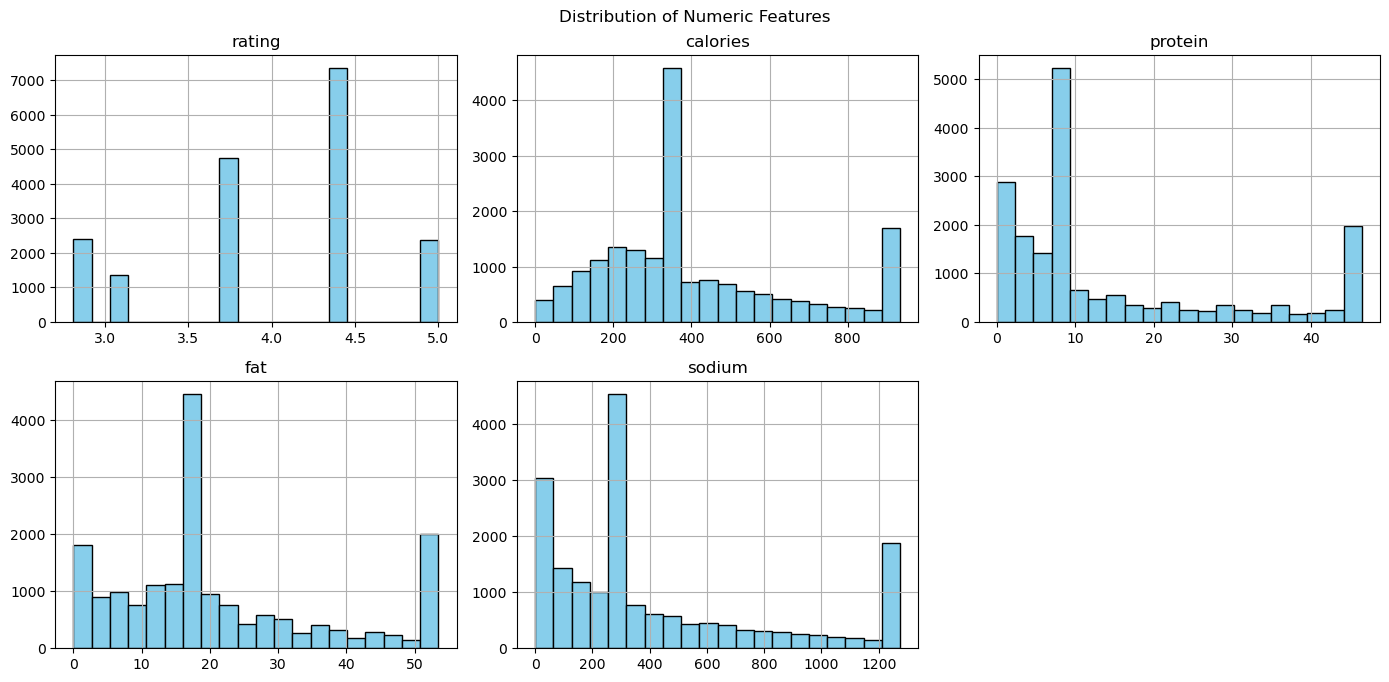

In [21]:
# Univariate Analysis of numeric columns (e.g., ratings, preparation time, etc.)
numeric_cols = ['rating', 'calories', 'protein', 'fat', 'sodium']

plt.figure(figsize=(14, 8))
df_full_recipe[numeric_cols].hist(bins=20, 
                          figsize=(14, 10), 
                          layout=(3, 3), 
                          color='skyblue', 
                          edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.tight_layout()
plt.show()

#### Correlation Heatmap for Numeric Columns

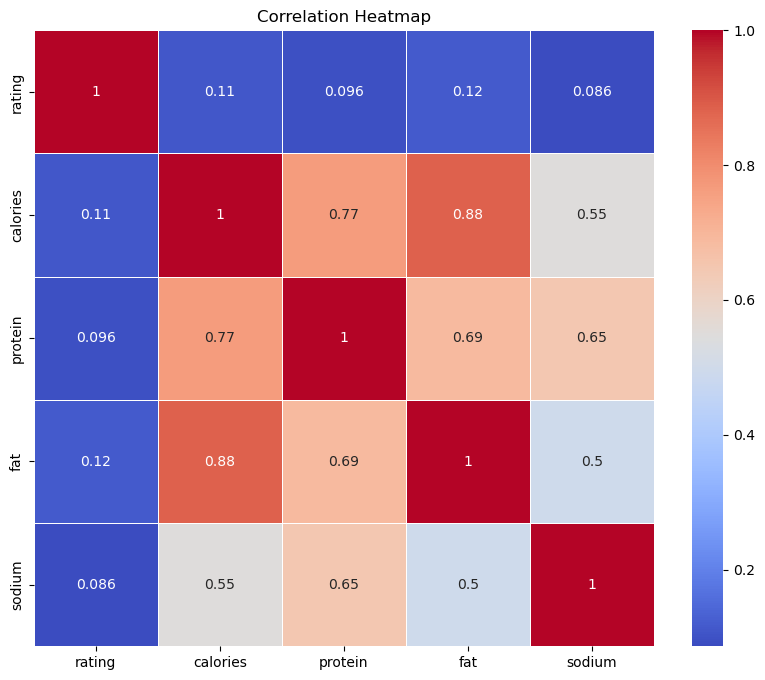

In [22]:
plt.figure(figsize=(10, 8))
corr_matrix = df_new[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Average Rating

In [23]:
df_full_recipe.rating.mean()

3.9959111829488796

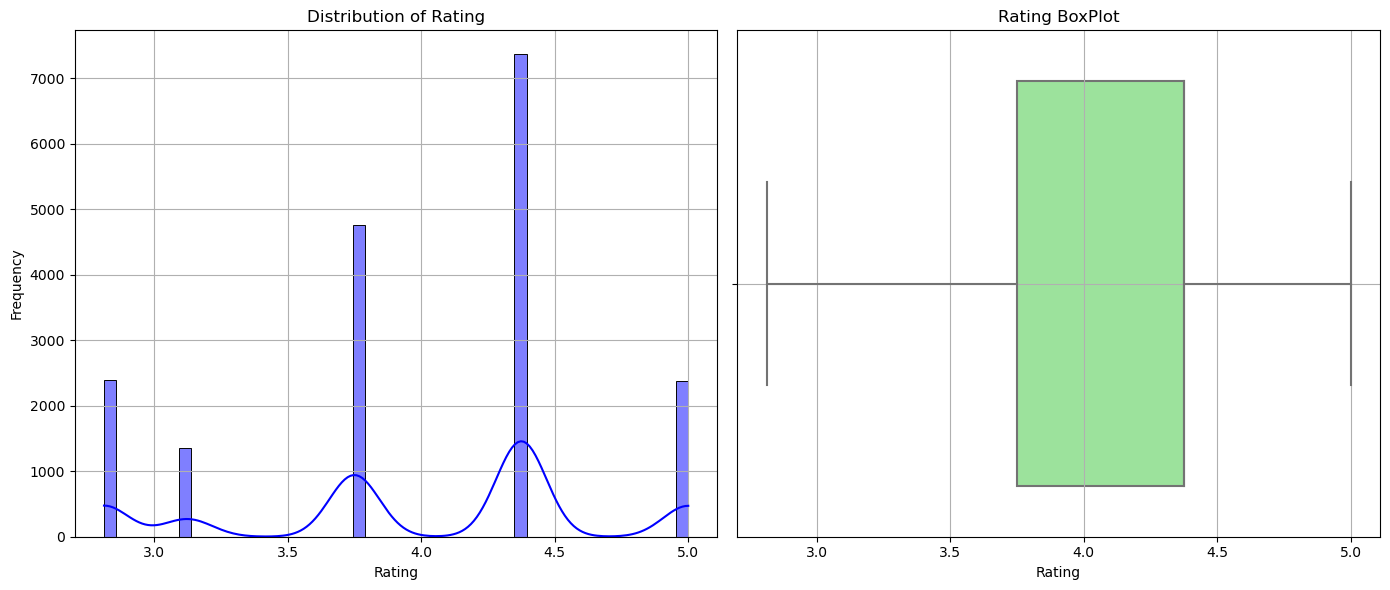

In [24]:
plt.figure(figsize=(14, 6))

# Distribution of Rating
plt.subplot(1, 2, 1)
sns.histplot(df_full_recipe['rating'], kde=True, color='blue')  # kde=True will add the Kernel Density Estimation curve
plt.title("Distribution of Rating")
plt.grid(True)  # Add grid lines for the plot
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_full_recipe['rating'], color='lightgreen')
plt.title("Rating BoxPlot")
plt.grid(True)  # Add grid lines for the plot
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

#### Average Nutrients

In [25]:
df_full_recipe[["calories","protein","fat","sodium"]].mean()

calories    401.373541
protein      14.619117
fat          21.147143
sodium      420.958632
dtype: float64

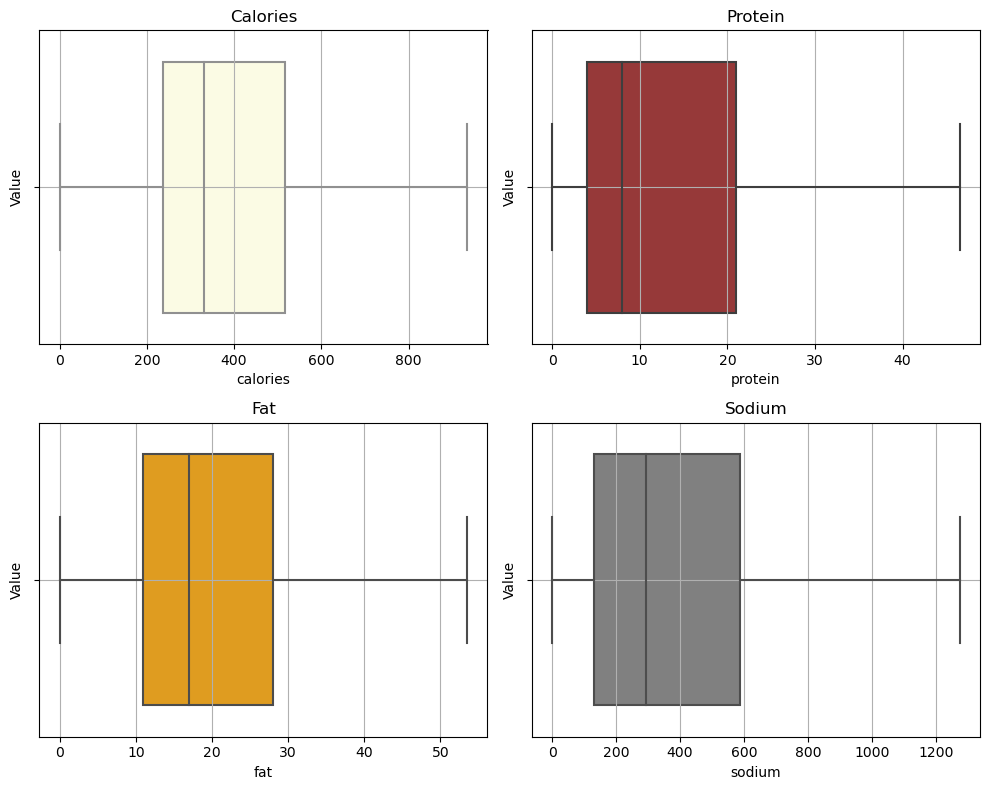

In [26]:
plt.figure(figsize=(10, 8))

# Box Plot for Calories
plt.subplot(2, 2, 1)
sns.boxplot(x=df_full_recipe['calories'], color='lightyellow')
plt.title("Calories")
plt.ylabel("Value")
plt.grid(True)

# Box Plot for Protein
plt.subplot(2, 2, 2)
sns.boxplot(x=df_full_recipe['protein'], color='brown')
plt.title("Protein")
plt.ylabel("Value")
plt.grid(True)

# Box Plot for Fat
plt.subplot(2, 2, 3)
sns.boxplot(x=df_full_recipe['fat'], color='orange')
plt.title("Fat")
plt.ylabel("Value")
plt.grid(True)

# Box Plot for Sodium
plt.subplot(2, 2, 4)
sns.boxplot(x=df_full_recipe['sodium'], color='grey')
plt.title("Sodium")
plt.ylabel("Value")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Distribution of Protein, Fat and Sodium

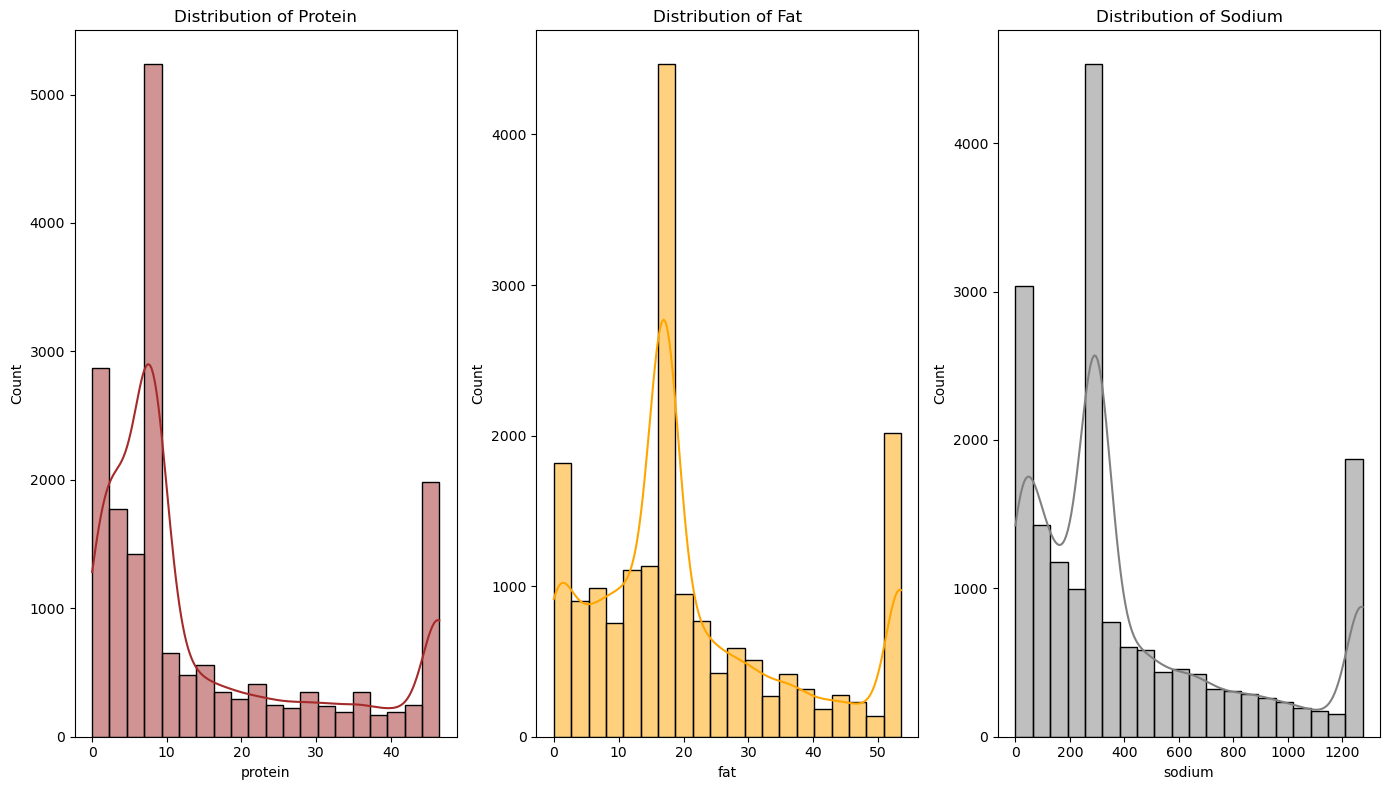

In [27]:
plt.figure(figsize=(14, 8))

# Protein Distribution
plt.subplot(1, 3, 1)
sns.histplot(df_full_recipe['protein'], bins=20, kde=True, color='brown')
plt.title('Distribution of Protein')

# Fat Distribution
plt.subplot(1, 3, 2)
sns.histplot(df_full_recipe['fat'], bins=20, kde=True, color='orange')
plt.title('Distribution of Fat')

# Sodium Distribution
plt.subplot(1, 3, 3)
sns.histplot(df_full_recipe['sodium'], bins=20, kde=True, color='grey')
plt.title('Distribution of Sodium')

plt.tight_layout()
plt.show()

#### Pairplot for Multivariate Analysis

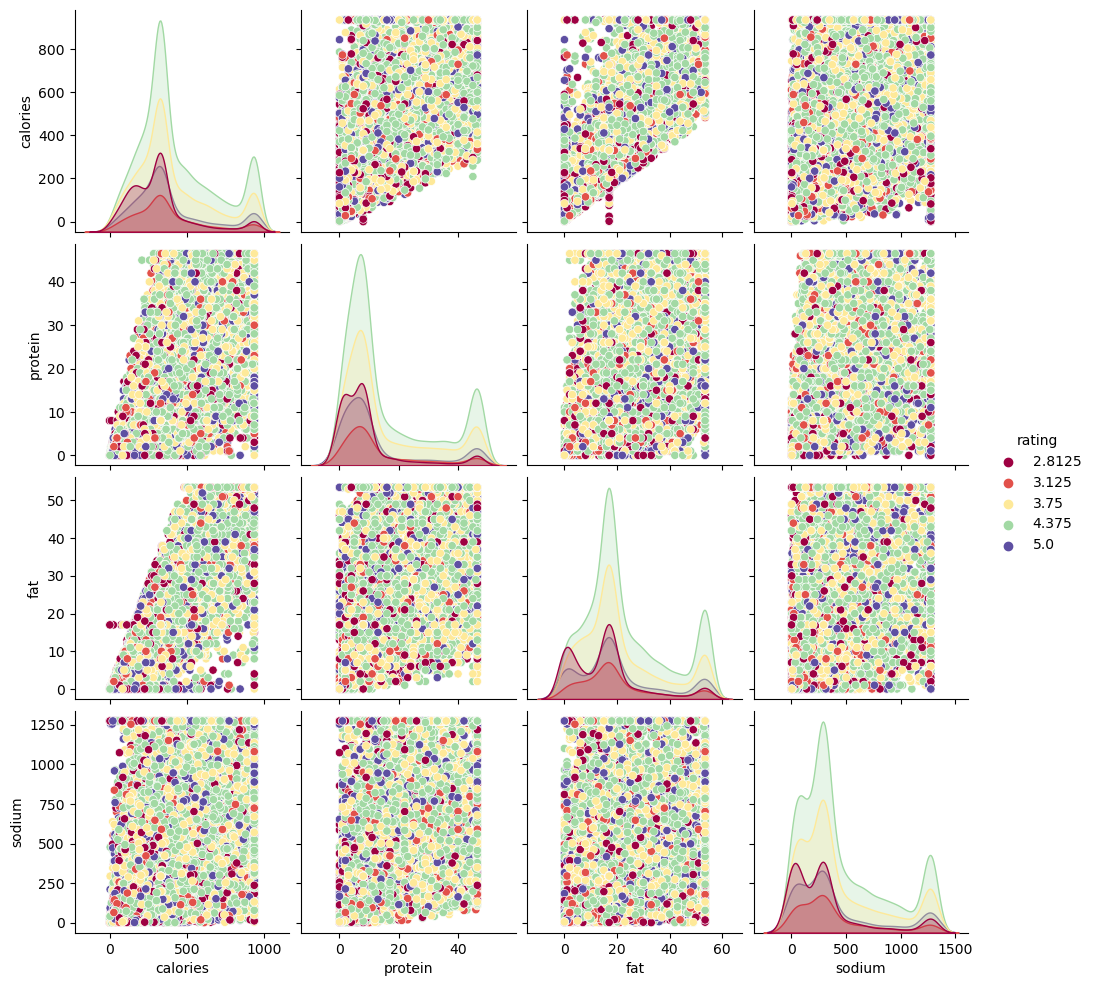

In [28]:
# A pairplot can visualize the relationships between multiple features
sns.pairplot(df_full_recipe[numeric_cols], hue='rating', palette="Spectral")
plt.show()

#### Cooking Categories Analysis

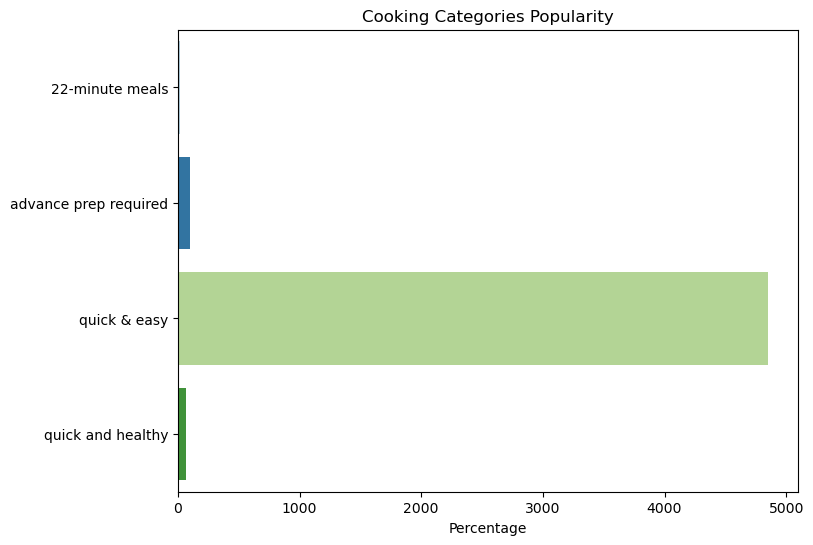

In [29]:
cooking_category = ["22-minute meals","advance prep required","quick & easy","quick and healthy"]
cooking_category_count = df_full_recipe[cooking_category].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=cooking_category_count.values, y=cooking_category_count.index, palette="Paired")
plt.title('Cooking Categories Popularity')
plt.xlabel('Percentage')
plt.show()

### Text Preprocessing

In [30]:
import spacy
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_texts(texts):
    if pd.isnull(texts):  # Check if the input is None or NaN
        return ""
    
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Tokenization (if not already tokenized)
    tokens = word_tokenize(texts)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing punctuation and stopwords
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Return processed text as a single string
    return " ".join(tokens)

df_full_recipe["preprocessed_ingredients"] = df_full_recipe["concatenated_ingredients"].swifter.apply(preprocess_texts)

Pandas Apply:   0%|          | 0/18251 [00:00<?, ?it/s]

In [31]:
df_processed_recipe = df_full_recipe
df_processed_recipe

,title,rating,calories,protein,fat,sodium,22-minute meals,advance prep required,alcoholic,bread,...,rice,spring,summer,vegetable,winter,len_directions,len_ingredients,categories,concatenated_ingredients,preprocessed_ingredients
0,"Lentil, Apple, and Turkey Wrap",2.8125,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,15.0,"Sandwich, Bean, Fruit, Tomato, turkey, Vegetab...",4 cups low-sodium vegetable or chicken stock 1...,4 cup low-sodium vegetable chicken stock 1 cup...
1,Boudin Blanc Terrine with Red Onion Confit,4.3750,403.0,18.0,23.0,1274.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,28.0,"Food Processor, Onion, Pork, Bake, Bastille Da...","1 1/2 cups whipping cream 2 medium onions, cho...",1 1/2 cup whipping cream 2 medium onion choppe...
2,Potato and Fennel Soup Hodge,3.7500,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,6.0,"Soup/Stew, Dairy, Potato, Vegetable, Fennel, G...","1 fennel bulb (sometimes called anise), stalks...",1 fennel bulb sometimes called anise stalk dis...
3,Mahi-Mahi in Tomato Olive Sauce,5.0000,331.0,8.0,17.0,294.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,10.0,"Fish, Olive, Tomato, Sauté, Low Fat, Low Cal, ...",2 tablespoons extra-virgin olive oil 1 cup cho...,2 tablespoon extra-virgin olive oil 1 cup chop...
4,Spinach Noodle Casserole,3.1250,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,6.0,"Cheese, Dairy, Pasta, Vegetable, Side, Bake, V...","1 12-ounce package frozen spinach soufflé, tha...",1 12-ounce package frozen spinach soufflé thaw...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18246,Parmesan Puffs,3.1250,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,7.0,"Mixer, Cheese, Egg, Fry, Cocktail Party, Veget...",About 6 cups vegetable oil 1/4 pound finely gr...,6 cup vegetable oil 1/4 pound finely grated pa...
18247,Artichoke and Parmesan Risotto,4.3750,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2.0,8.0,"Side, Kid-Friendly, High Fiber, Dinner, Parmes...",5 1/2 cups (or more) low-salt chicken broth 2 ...,5 1/2 cup low-salt chicken broth 2 tablespoon ...
18248,Turkey Cream Puff Pie,4.3750,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,6.0,17.0,"Onion, Poultry, turkey, Vegetable, Bake, Kid-F...","1 small tomato 1 small onion, finely chopped (...",1 small tomato 1 small onion finely chopped 1/...
18249,Snapper on Angel Hair with Citrus Cream,4.3750,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,5.0,18.0,"Milk/Cream, Citrus, Dairy, Fish, Garlic, Pasta...","4 tablespoons olive oil 4 shallots, thinly sli...",4 tablespoon olive oil 4 shallot thinly sliced...


#### Creating a target variable

The target variable should categorize recipes as "Healthy" or "Unhealthy", based on criteria such as nutrient content and ingredient composition. These criteria align with dietary goals for seniors, such as reducing high cholesterol or sodium levels.

In [32]:
# Define thresholds for healthy recipes
def classify_recipe(row):
    if row['sodium'] < 500 and row['fat'] < 15 and row['calories'] < 400:
        return 'Healthy'
    else:
        return 'Unhealthy'

# Apply classification logic
df_processed_recipe['target'] = df.apply(classify_recipe, axis=1)
y = df_processed_recipe['target']

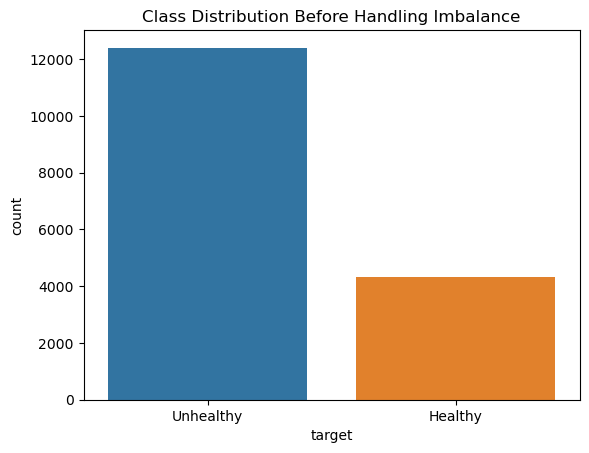

Unhealthy    12404
Healthy       4327
Name: target, dtype: int64


In [33]:
sns.countplot(x=df_processed_recipe['target'])
plt.title("Class Distribution Before Handling Imbalance")
plt.show()

# Print exact class counts
print(df_processed_recipe['target'].value_counts())

### Class Imbalance
Random Oversampling is applied to increase the number of samples in the minority class ('Healthy') by duplicating existing examples.

In [34]:
# Ensure the target variable is a categorical type (convert to string if needed)
df_processed_recipe['target'] = df_processed_recipe['target'].astype(str)  # Convert to string
y = df_processed_recipe['target']

# Check for any NaN values in the target column
print("Missing values in target column:", y.isnull().sum())

# Remove NaN values if any exist
df_processed_recipe = df_processed_recipe.dropna(subset=['target'])
y = df_processed_recipe['target']  # Update y after removing NaNs

# Define feature columns (excluding target)
feature_cols = df_processed_recipe.columns[df_processed_recipe.columns != 'target']

# Separate features and target
X = df_processed_recipe[feature_cols]
y = df_processed_recipe['target']

Missing values in target column: 0


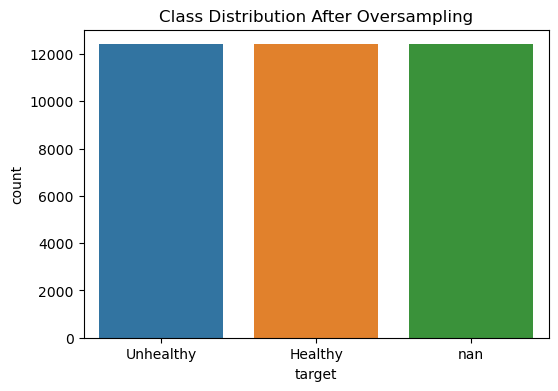

Class Distribution After Oversampling:
Unhealthy    12404
Healthy      12404
nan          12404
Name: target, dtype: int64


In [35]:
# Apply Random Oversampling
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert back to a DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=feature_cols)
df_balanced['target'] = y_resampled

# Check class distribution after resampling
plt.figure(figsize=(6,4))
sns.countplot(x=df_balanced['target'])
plt.title("Class Distribution After Oversampling")
plt.show()

# Print final class distribution
print("Class Distribution After Oversampling:")
print(df_balanced['target'].value_counts())

In [36]:
df_balanced.to_csv(r"G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\df_balanced_recipe.csv", index=False)
print("Balanced dataset saved successfully.")

Balanced dataset saved successfully.


#### TF-IDF Vectorisation, scaling and splitting of data

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit vocabulary size to 10,000 for efficiency

# Fit and transform the preprocessed_ingredients column
tfidf_features = tfidf_vectorizer.fit_transform(df_balanced["preprocessed_ingredients"].fillna(""))

# Convert sparse matrix to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numeric features
df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df_balanced[numeric_cols]), columns=numeric_cols)

# Concatenate the scaled numeric features and TF-IDF transformed ingredient features
df_final_features = pd.concat([df_scaled_numeric, tfidf_df], axis=1)

# Extract final features and target
X = df_final_features
y = df_balanced['target']  # Use the corrected target column

# Split data into train (70%) and temp set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temp set equally into validation (15%) and test set (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset shapes
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (26048, 6089) (26048,)
Validation set size: (5582, 6089) (5582,)
Test set size: (5582, 6089) (5582,)


### Baseline models

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val)

In [41]:
# Calculate metrics
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf, average='weighted')
recall_rf = recall_score(y_val, y_val_pred_rf, average='weighted')
f1_rf = f1_score(y_val, y_val_pred_rf, average='weighted')

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Random Forest Performance:
Accuracy: 0.9507345037620925
Precision: 0.9506353729299275
Recall: 0.9507345037620925
F1 Score: 0.9506599579462048


In [42]:
print("Random Forest Classification Report:")
print(classification_report(y_val, y_val_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

     Healthy       0.94      0.92      0.93      1860
   Unhealthy       0.92      0.93      0.93      1861
         nan       0.99      1.00      0.99      1861

    accuracy                           0.95      5582
   macro avg       0.95      0.95      0.95      5582
weighted avg       0.95      0.95      0.95      5582

Random Forest Confusion Matrix:
[[1719  141    0]
 [ 114 1730   17]
 [   0    3 1858]]


#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
# Predict on the validation set
y_val_pred_lr = lr_model.predict(X_val)

In [45]:
# Calculate metrics
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
precision_lr = precision_score(y_val, y_val_pred_lr, average='weighted')
recall_lr = recall_score(y_val, y_val_pred_lr, average='weighted')
f1_lr = f1_score(y_val, y_val_pred_lr, average='weighted')

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Logistic Regression Performance:
Accuracy: 0.5553565030455034
Precision: 0.5507917977051616
Recall: 0.5553565030455034
F1 Score: 0.5507686975039295


In [46]:
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_val_pred_lr))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Healthy       0.53      0.54      0.54      1860
   Unhealthy       0.52      0.43      0.47      1861
         nan       0.60      0.70      0.65      1861

    accuracy                           0.56      5582
   macro avg       0.55      0.56      0.55      5582
weighted avg       0.55      0.56      0.55      5582

Logistic Regression Confusion Matrix:
[[1001  473  386]
 [ 593  804  464]
 [ 282  284 1295]]


### Multi-Layer Neural Network (MLNN)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Encode the target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Define the MLNN model
mlnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Adjust input shape to X_train
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense((len(label_encoder.classes_)), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
mlnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
    metrics=['accuracy']
)

# Summary of the model
mlnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         779,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 787,971 (3.01 MB)

 Trainable params: 787,971 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Train the model
mlnn_history = mlnn_model.fit(
    X_train,
    y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3915 - loss: 1.0702 - val_accuracy: 0.5871 - val_loss: 0.8361
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6501 - loss: 0.7388 - val_accuracy: 0.7248 - val_loss: 0.5744
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7825 - loss: 0.4931 - val_accuracy: 0.7813 - val_loss: 0.4776
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8493 - loss: 0.3649 - val_accuracy: 0.8212 - val_loss: 0.4335
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8861 - loss: 0.2802 - val_accuracy: 0.8366 - val_loss: 0.4085
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9166 - loss: 0.2210 - val_accuracy: 0.8637 - val_loss: 0.3836
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9361 - loss: 0.1797 - val_accuracy: 0.8651 - val_loss: 0.3883
Epoch 8/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9450 - loss: 0.1488 - val_accuracy: 0.

### Plot Training History

In [49]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [50]:
# Evaluate the model on the validation set
val_loss, val_accuracy = mlnn_model.evaluate(X_val, y_val_encoded, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict on the validation set
y_val_pred = np.argmax(mlnn_model.predict(X_val), axis=1)

# Decode predictions to original labels
y_val_pred_decoded = label_encoder.inverse_transform(y_val_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred_decoded)
precision = precision_score(y_val, y_val_pred_decoded, average='weighted', zero_division=0)
recall = recall_score(y_val, y_val_pred_decoded, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_val_pred_decoded, average='weighted', zero_division=0)

print("\nMLNN Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Validation Loss: 0.5556120276451111
Validation Accuracy: 0.870118260383606
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step

MLNN Model Performance:
Accuracy: 0.870118237190971
Precision: 0.8778160297153891
Recall: 0.870118237190971
F1 Score: 0.8657773219354183


In [51]:
# Display Classification Report
print("MLNN Classification Report:")
print(classification_report(y_val, y_val_pred_decoded))

# Display Confusion Matrix
print("MLNN Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_decoded, labels=label_encoder.classes_))

MLNN Classification Report:
              precision    recall  f1-score   support

     Healthy       0.79      0.93      0.85      1860
   Unhealthy       0.91      0.68      0.78      1861
         nan       0.93      1.00      0.96      1861

    accuracy                           0.87      5582
   macro avg       0.88      0.87      0.87      5582
weighted avg       0.88      0.87      0.87      5582

MLNN Confusion Matrix:
[[1738  112   10]
 [ 470 1267  124]
 [   3    6 1852]]


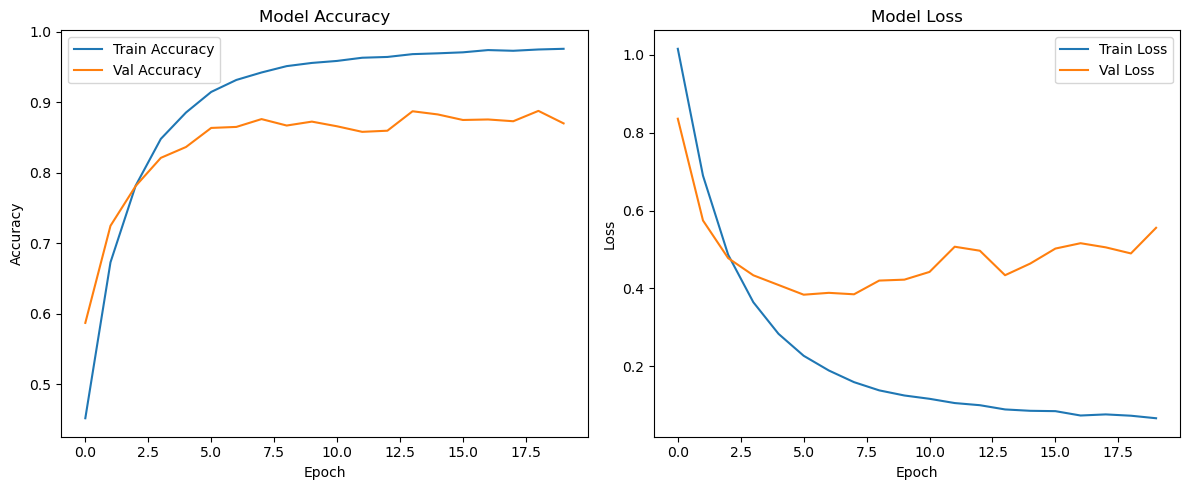

In [52]:
# Call the function
plot_training_history(mlnn_history)

### NLP Integration

In [53]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Paths to input and output files
glove_input_file = r"G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\glove.6B.100d.txt"
word2vec_output_file = r"G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\glove.6B.100d.word2vec.txt"

# Convert GloVe to Word2Vec format
glove2word2vec(glove_input_file, word2vec_output_file)

# Load Word2Vec format embeddings
word_vectors = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

print("Pre-trained word embeddings successfully loaded.")

Pre-trained word embeddings successfully loaded.


In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the preprocessed ingredients
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_balanced["preprocessed_ingredients"].fillna(""))

# Create a vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size

# Convert text into sequences
text_sequences = tokenizer.texts_to_sequences(df_balanced["preprocessed_ingredients"].fillna(""))

# Pad sequences to ensure uniform input size
max_sequence_length = 100  # Set max sequence length

# Pad sequences to ensure uniform input shape
padded_sequences = pad_sequences(text_sequences, maxlen=max_sequence_length, padding="post")

print("Text tokenization and padding completed. Shape:", padded_sequences.shape)

Text tokenization and padding completed. Shape: (37212, 100)


In [55]:
# Set embedding dimensions (GloVe vectors are 100-dimensional)
embedding_dim = 100

# Initialize an empty embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Map words to pre-trained GloVe vectors
for word, i in tokenizer.word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

print("Embedding matrix created with shape:", embedding_matrix.shape)

Embedding matrix created with shape: (6252, 100)


In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate

# Define structured input (Numeric data)
structured_input = Input(shape=(X_train.shape[1],), name="Structured_Input")
structured_branch = Dense(128, activation="relu")(structured_input)
structured_branch = Dropout(0.3)(structured_branch)

# Define text input (Ingredients)
text_input = Input(shape=(max_sequence_length,), name="Text_Input")
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],  # Pre-trained embeddings
    input_length=max_sequence_length,
    trainable=False  # Keep embeddings frozen
)(text_input)
text_branch = LSTM(128, activation="relu")(embedding_layer)

# Concatenate structured and text branches
concatenated = Concatenate()([structured_branch, text_branch])
dense_1 = Dense(64, activation="relu")(concatenated)
dropout_1 = Dropout(0.3)(dense_1)
output = Dense(len(label_encoder.classes_), activation="softmax")(dropout_1)

# Define the model
nlp_mlnn_model = Model(inputs=[structured_input, text_input], outputs=output)

# Compile the model
nlp_mlnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model summary
nlp_mlnn_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Structured_Input (InputLayer) │ (None, 6089)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Text_Input (InputLayer)       │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 128)               │         779,520 │ Structured_Input[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 100, 100)          │         625,200 │ Text_Input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 128)               │               0 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 128)               │         117,248 │ embedding[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 256)               │               0 │ dropout_2[0][0],           │
│                               │                           │                 │ lstm[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 64)                │          16,448 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 64)                │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 3)                 │             195 │ dropout_3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,538,611 (5.87 MB)

 Trainable params: 913,411 (3.48 MB)

 Non-trainable params: 625,200 (2.38 MB)

In [57]:
# Train the model
nlp_mlnn_history = nlp_mlnn_model.fit(
    [X_train, padded_sequences[:len(X_train)]],  
    y_train_encoded,
    validation_data=(
        [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]],  
        y_val_encoded
    ),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.3868 - loss: 1.0772 - val_accuracy: 0.5448 - val_loss: 0.8961
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6401 - loss: 0.7658 - val_accuracy: 0.7221 - val_loss: 0.5846
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7822 - loss: 0.5068 - val_accuracy: 0.7832 - val_loss: 0.4869
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8473 - loss: 0.3697 - val_accuracy: 0.8174 - val_loss: 0.4196
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8939 - loss: 0.2765 - val_accuracy: 0.8312 - val_loss: 0.4205
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9180 - loss: 0.2171 - val_accuracy: 0.8488 - val_loss: 0.4140
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9374 - loss: 0.1726 - val_accuracy: 0.8556 - val_loss: 0.4202
Epoch 8/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9440 - loss: 0.1521 - 

In [58]:
# Evaluate on validation set
val_loss, val_accuracy = nlp_mlnn_model.evaluate(
    [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]],
    y_val_encoded,
    verbose=0
)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Validation Loss: 0.6141997575759888
Validation Accuracy: 0.8568613529205322


In [59]:
# Predict on validation set
y_val_pred = np.argmax(nlp_mlnn_model.predict(
    [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]]
), axis=1)

# Decode predictions to original labels
y_val_pred_decoded = label_encoder.inverse_transform(y_val_pred)

# Compute evaluation metrics
accuracy_nlp = accuracy_score(y_val, y_val_pred_decoded)
precision_nlp = precision_score(y_val, y_val_pred_decoded, average='weighted', zero_division=0)
recall_nlp = recall_score(y_val, y_val_pred_decoded, average='weighted', zero_division=0)
f1_nlp = f1_score(y_val, y_val_pred_decoded, average='weighted', zero_division=0)

# Display metrics
print("\nMLNN with NLP Integration Performance:")
print(f"Accuracy: {accuracy_nlp}")
print(f"Precision: {precision_nlp}")
print(f"Recall: {recall_nlp}")
print(f"F1 Score: {f1_nlp}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_decoded))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_decoded, labels=label_encoder.classes_))

175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step

MLNN with NLP Integration Performance:
Accuracy: 0.8568613400214977
Precision: 0.8665153100080064
Recall: 0.8568613400214977
F1 Score: 0.8517344781590782

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.76      0.93      0.84      1860
   Unhealthy       0.90      0.65      0.75      1861
         nan       0.94      0.99      0.96      1861

    accuracy                           0.86      5582
   macro avg       0.87      0.86      0.85      5582
weighted avg       0.87      0.86      0.85      5582


Confusion Matrix:
[[1726  128    6]
 [ 535 1207  119]
 [   8    3 1850]]


### Tuning of hyperparameters

In [60]:
# Function to create the MLNN model
def create_model(hp):
    # Structured Input
    structured_input = Input(shape=(X_train.shape[1],), name="Structured_Input")
    structured_branch = Dense(
        units=hp.Int("units_input", min_value=64, max_value=256, step=64),  
        activation="relu"
    )(structured_input)
    structured_branch = Dropout(hp.Choice("dropout_rate", values=[0.3, 0.5]))(structured_branch)

    # Text Input (Embedding Layer with LSTM)
    text_input = Input(shape=(max_sequence_length,), name="Text_Input")
    embedding_layer = Embedding(
        input_dim=vocab_size, 
        output_dim=embedding_dim, 
        weights=[embedding_matrix], 
        input_length=max_sequence_length,  
        trainable=False  
    )(text_input)
    
    text_branch = LSTM(
        units=hp.Int("units_lstm", min_value=32, max_value=128, step=32),  
        activation="relu"
    )(embedding_layer)

    # Concatenate both branches
    concatenated = Concatenate()([structured_branch, text_branch])

    # Fully Connected Layers
    dense_1 = Dense(
        units=hp.Int("units_hidden", min_value=32, max_value=128, step=32),  
        activation="relu"
    )(concatenated)
    dropout_1 = Dropout(hp.Choice("dropout_rate_hidden", values=[0.3, 0.5]))(dense_1)
    output = Dense(len(label_encoder.classes_), activation="softmax")(dropout_1)

    # Compile the model
    model = Model(inputs=[structured_input, text_input], outputs=output)
    model.compile(
        optimizer=Adam(hp.Choice("learning_rate", values=[0.001, 0.0005])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

#### RandomSearch

In [61]:
from kerastuner.tuners import RandomSearch

# Instantiate KerasTuner RandomSearch
tuner = RandomSearch(
    create_model,
    objective="val_accuracy",
    max_trials=10,  # Number of different hyperparameter combinations to test
    executions_per_trial=1,  # Run each model once
    directory="hyperparameter_tuning",
    project_name="mlnn_random_search", 
    overwrite=True
)

# Perform the search
tuner.search(
    [X_train, padded_sequences[:len(X_train)]],  
    y_train_encoded,
    validation_data=(
        [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]],  
        y_val_encoded
    ),
    epochs=20,
    batch_size=32,
    verbose=1
)

Trial 10 Complete [00h 06m 54s]
val_accuracy: 0.8971694707870483

Best val_accuracy So Far: 0.8971694707870483
Total elapsed time: 00h 50m 04s


In [62]:
# Retrieve the best hyperparameters
best_RS_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best RS Hyperparameters:", best_RS_hps.values)

Best RS Hyperparameters: {'units_input': 256, 'dropout_rate': 0.3, 'units_lstm': 128, 'units_hidden': 128, 'dropout_rate_hidden': 0.5, 'learning_rate': 0.0005}


In [63]:
# Build the best model
best_RS_model = tuner.hypermodel.build(best_RS_hps)

# Train the model with the best hyperparameters
RS_history = best_RS_model.fit(
    [X_train, padded_sequences[:len(X_train)]],
    y_train_encoded,
    validation_data=(
        [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]],
        y_val_encoded
    ),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.3796 - loss: 1.0817 - val_accuracy: 0.5570 - val_loss: 0.9140
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.6220 - loss: 0.7992 - val_accuracy: 0.7211 - val_loss: 0.6064
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7778 - loss: 0.5056 - val_accuracy: 0.7736 - val_loss: 0.4851
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8598 - loss: 0.3507 - val_accuracy: 0.8221 - val_loss: 0.4147
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9069 - loss: 0.2526 - val_accuracy: 0.8604 - val_loss: 0.3685
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9360 - loss: 0.1853 - val_accuracy: 0.8699 - val_loss: 0.3634
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9558 - loss: 0.1342 - val_accuracy: 0.8784 - val_loss: 0.3626
Epoch 8/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9646 - loss: 126.9146 

In [64]:
# Evaluate the RS model on the test set
test_loss, test_accuracy = best_RS_model.evaluate(
    [X_test, padded_sequences[len(X_train) + len(X_val):]],  
    y_test_encoded,
    verbose=0
)

print(f"Best MLNN RS Model Test Accuracy: {test_accuracy}")

# Predict on test set
y_test_pred = np.argmax(best_RS_model.predict(
    [X_test, padded_sequences[len(X_train) + len(X_val):]]
), axis=1)

# Decode predictions
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Calculate performance metrics
accuracy_mlnn_RS = accuracy_score(y_test, y_test_pred_decoded)
precision_mlnn_RS = precision_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)
recall_mlnn_RS = recall_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)
f1_mlnn_RS = f1_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)

# Print evaluation results
print("\nMLNN RS Model Performance:")
print(f"Accuracy: {accuracy_mlnn_RS}")
print(f"Precision: {precision_mlnn_RS}")
print(f"Recall: {recall_mlnn_RS}")
print(f"F1 Score: {f1_mlnn_RS}")

Best MLNN RS Model Test Accuracy: 0.9016481637954712
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step

MLNN RS Model Performance:
Accuracy: 0.9016481547832318
Precision: 0.9036250060556503
Recall: 0.9016481547832318
F1 Score: 0.900017123640709


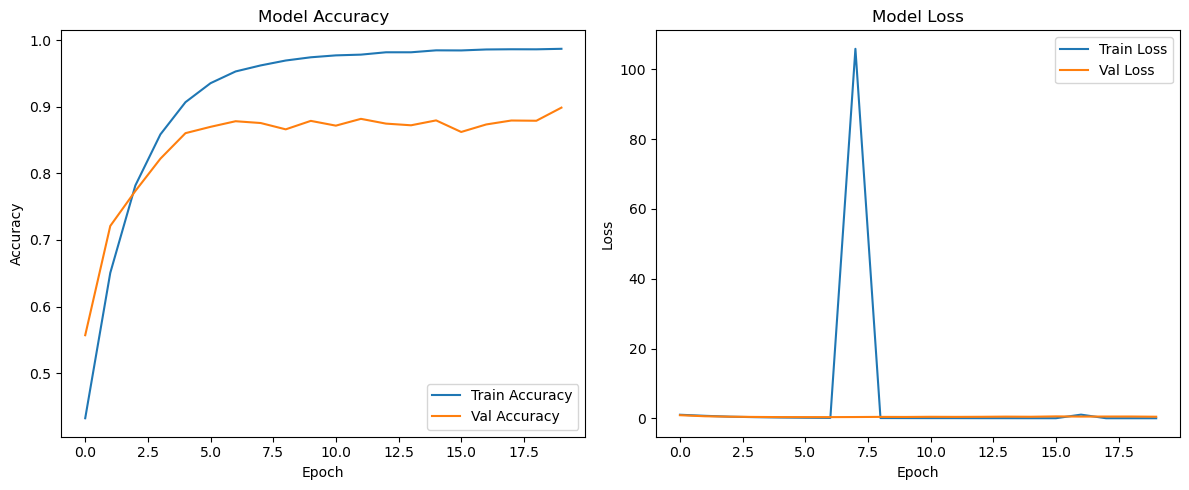

In [65]:
# Call the function
plot_training_history(RS_history)

#### Bayesian Optimisation

In [66]:
from kerastuner.tuners import BayesianOptimization

tuner = BayesianOptimization(
    create_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=1,
    directory="hyperparameter_tuning",
    project_name="mlnn_bayesian_opt", 
    overwrite=True
)

# Perform the search
tuner.search(
    [X_train, padded_sequences[:len(X_train)]],  
    y_train_encoded,
    validation_data=(
        [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]],  
        y_val_encoded
    ),
    epochs=20,
    batch_size=32,
    verbose=1
)

Trial 20 Complete [00h 04m 39s]
val_accuracy: 0.8720888495445251

Best val_accuracy So Far: 0.8987817764282227
Total elapsed time: 01h 43m 47s


In [67]:
# Retrieve the best hyperparameters
best_BO_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best BS Hyperparameters:", best_BO_hps.values)

Best BS Hyperparameters: {'units_input': 256, 'dropout_rate': 0.5, 'units_lstm': 64, 'units_hidden': 96, 'dropout_rate_hidden': 0.3, 'learning_rate': 0.001}


In [68]:
# Build the best model
best_BO_model = tuner.hypermodel.build(best_BO_hps)

# Train the model with the best hyperparameters
BO_history = best_BO_model.fit(
    [X_train, padded_sequences[:len(X_train)]],
    y_train_encoded,
    validation_data=(
        [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]],
        y_val_encoded
    ),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.3765 - loss: 1.0789 - val_accuracy: 0.5761 - val_loss: 0.8773
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6198 - loss: 0.7932 - val_accuracy: 0.7238 - val_loss: 0.6052
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7545 - loss: 0.5427 - val_accuracy: 0.7795 - val_loss: 0.4899
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8307 - loss: 0.4023 - val_accuracy: 0.8185 - val_loss: 0.4212
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8685 - loss: 1474.1930 - val_accuracy: 0.8520 - val_loss: 0.3812
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8954 - loss: 0.2610 - val_accuracy: 0.8574 - val_loss: 0.3693
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9137 - loss: 0.2340 - val_accuracy: 0.8719 - val_loss: 0.3606
Epoch 8/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9267 - loss: 0.1983

In [69]:
# Evaluate the BO model on the test set
test_loss, test_accuracy = best_BO_model.evaluate(
    [X_test, padded_sequences[len(X_train) + len(X_val):]],  
    y_test_encoded,
    verbose=0
)

print(f"Best MLNN BO Model Test Accuracy: {test_accuracy}")

# Predict on test set
y_test_pred = np.argmax(best_BO_model.predict(
    [X_test, padded_sequences[len(X_train) + len(X_val):]]
), axis=1)

# Decode predictions
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Calculate performance metrics
accuracy_mlnn_BO = accuracy_score(y_test, y_test_pred_decoded)
precision_mlnn_BO = precision_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)
recall_mlnn_BO = recall_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)
f1_mlnn_BO = f1_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)

# Print evaluation results
print("\nMLNN BO Model Performance:")
print(f"Accuracy: {accuracy_mlnn_BO}")
print(f"Precision: {precision_mlnn_BO}")
print(f"Recall: {recall_mlnn_BO}")
print(f"F1 Score: {f1_mlnn_BO}")

Best MLNN BO Model Test Accuracy: 0.880687952041626
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

MLNN BO Model Performance:
Accuracy: 0.8806879254747403
Precision: 0.8878685672569273
Recall: 0.8806879254747403
F1 Score: 0.8784656700320209


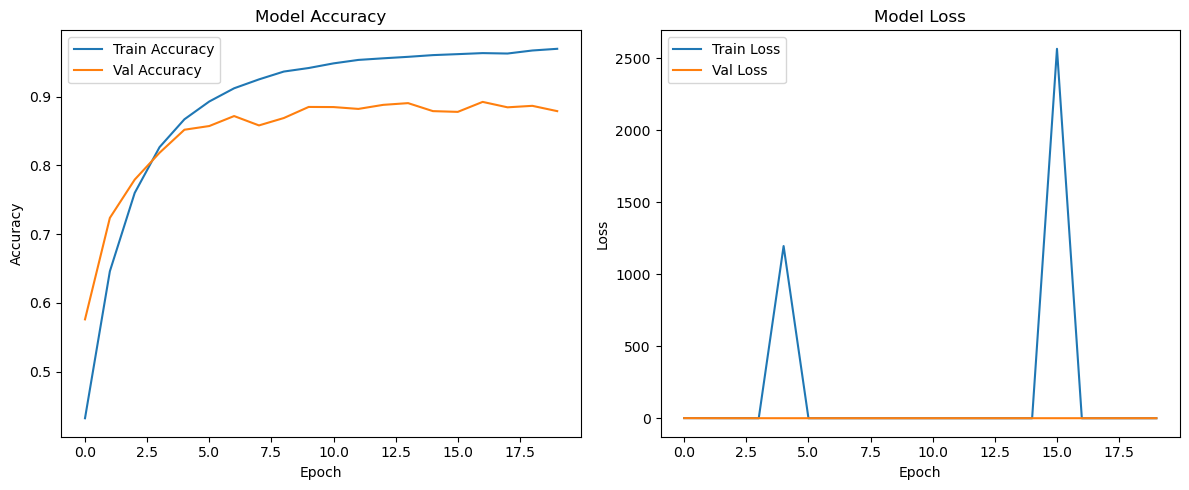

In [70]:
# Call the function
plot_training_history(BO_history)

#### GridSearch

In [71]:
from kerastuner.tuners import GridSearch

tuner = GridSearch(
    create_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,  
    directory="hyperparameter_tuning",
    project_name="mlnn_grid_search", 
    overwrite=True
)

# Perform the search
tuner.search(
    [X_train, padded_sequences[:len(X_train)]],  
    y_train_encoded,
    validation_data=(
        [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]],  
        y_val_encoded
    ),
    epochs=20,
    batch_size=32,
    verbose=1
)

Trial 10 Complete [00h 03m 24s]
val_accuracy: 0.874417781829834

Best val_accuracy So Far: 0.8907201886177063
Total elapsed time: 00h 32m 29s


In [72]:
# Retrieve the best hyperparameters
best_GS_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best BS Hyperparameters:", best_GS_hps.values)

Best BS Hyperparameters: {'units_input': 64, 'dropout_rate': 0.3, 'units_lstm': 32, 'units_hidden': 32, 'dropout_rate_hidden': 0.3, 'learning_rate': 0.001}


In [73]:
# Build the best model
best_GS_model = tuner.hypermodel.build(best_GS_hps)

# Train the model with the best hyperparameters
GS_history = best_GS_model.fit(
    [X_train, padded_sequences[:len(X_train)]],
    y_train_encoded,
    validation_data=(
        [X_val, padded_sequences[len(X_train):len(X_train) + len(X_val)]],
        y_val_encoded
    ),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3785 - loss: 285195.0000 - val_accuracy: 0.5328 - val_loss: 0.9578
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5596 - loss: 0.8944 - val_accuracy: 0.6492 - val_loss: 0.7350
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6987 - loss: 0.6664 - val_accuracy: 0.7189 - val_loss: 0.6024
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7648 - loss: 0.5255 - val_accuracy: 0.7639 - val_loss: 0.5262
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8086 - loss: 0.4403 - val_accuracy: 0.7895 - val_loss: 0.4809
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8453 - loss: 0.3733 - val_accuracy: 0.8103 - val_loss: 0.4487
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8722 - loss: 0.3238 - val_accuracy: 0.8264 - val_loss: 0.4397
Epoch 8/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8850 - loss: 0.2891

In [74]:
# Evaluate the GS model on the test set
test_loss, test_accuracy = best_GS_model.evaluate(
    [X_test, padded_sequences[len(X_train) + len(X_val):]],  
    y_test_encoded,
    verbose=0
)

print(f"Best MLNN GS Model Test Accuracy: {test_accuracy}")

# Predict on test set
y_test_pred = np.argmax(best_GS_model.predict(
    [X_test, padded_sequences[len(X_train) + len(X_val):]]
), axis=1)

# Decode predictions
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Calculate performance metrics
accuracy_mlnn_GS = accuracy_score(y_test, y_test_pred_decoded)
precision_mlnn_GS = precision_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)
recall_mlnn_GS = recall_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)
f1_mlnn_GS = f1_score(y_test, y_test_pred_decoded, average="weighted", zero_division=0)

# Print evaluation results
print("\nMLNN GS Model Performance:")
print(f"Accuracy: {accuracy_mlnn_GS}")
print(f"Precision: {precision_mlnn_GS}")
print(f"Recall: {recall_mlnn_GS}")
print(f"F1 Score: {f1_mlnn_GS}")

Best MLNN GS Model Test Accuracy: 0.8633106350898743
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

MLNN GS Model Performance:
Accuracy: 0.8633106413471874
Precision: 0.874888235714125
Recall: 0.8633106413471874
F1 Score: 0.8591935878885305


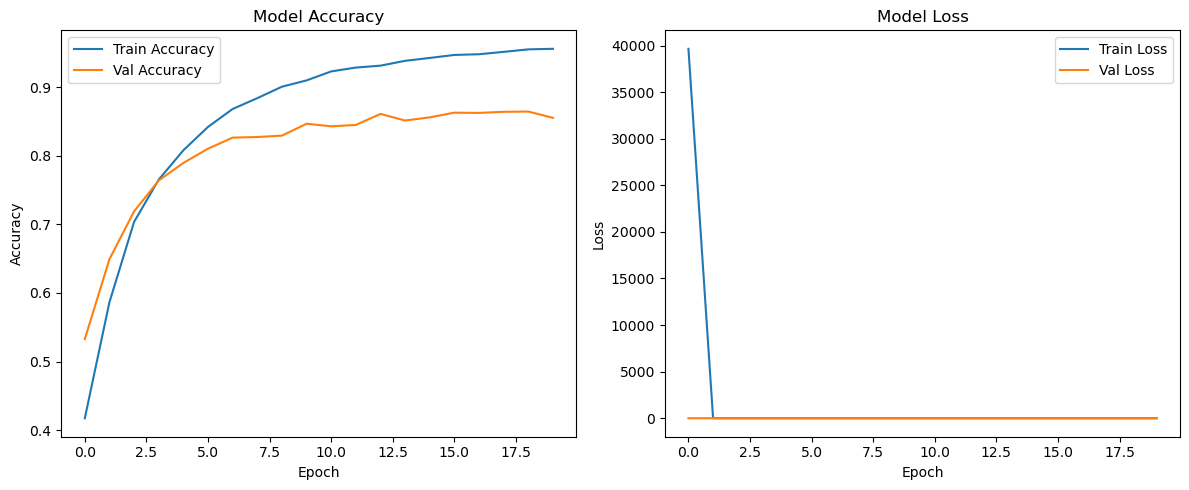

In [75]:
# Call the function
plot_training_history(GS_history)

In [76]:
# Compile results into a DataFrame
mlnn_results = pd.DataFrame({
    "Model": ["MLNN", "MLNN with NLP", "MLNN RandomSearch", "MLNN Bayesian Opt", "MLNN GridSearch"],
    "Accuracy": [accuracy, accuracy_nlp, accuracy_mlnn_RS, accuracy_mlnn_BO, accuracy_mlnn_GS],
    "Precision": [precision, precision_nlp, precision_mlnn_RS, precision_mlnn_BO, precision_mlnn_GS],
    "Recall": [recall, recall_nlp, recall_mlnn_RS, recall_mlnn_BO, recall_mlnn_GS],
    "F1 Score": [f1, f1_nlp, f1_mlnn_RS, f1_mlnn_BO, f1_mlnn_GS]
})

# Display the table
mlnn_results

,Model,Accuracy,Precision,Recall,F1 Score
0,MLNN,0.870118,0.877816,0.870118,0.865777
1,MLNN with NLP,0.856861,0.866515,0.856861,0.851734
2,MLNN RandomSearch,0.901648,0.903625,0.901648,0.900017
3,MLNN Bayesian Opt,0.880688,0.887869,0.880688,0.878466
4,MLNN GridSearch,0.863311,0.874888,0.863311,0.859194


### Save the trained MLNN model

In [82]:
from tensorflow.keras.models import save_model

# Define your save path
save_dir = r"G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

# Full model save path
model_path = os.path.join(save_dir, "mlnn_model.keras")

# Save the entire model (architecture + weights + training config)
best_RS_model.save(model_path)

print(f"Full model saved successfully at: {model_path}")

Full model saved successfully at: G:\UOL BSc Comp Sci\Y3S2\CM3070 FYP\mlnn_model.keras


In [83]:
# Compile results into a DataFrame
results = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Best MLNN"],
    "Accuracy": [accuracy_rf, accuracy_lr, accuracy_mlnn_RS],
    "Precision": [precision_rf, precision_lr, precision_mlnn_RS],
    "Recall": [recall_rf, recall_lr, recall_mlnn_RS],
    "F1 Score": [f1_rf, f1_lr, f1_mlnn_RS]
})

# Display the table
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.950735   0.950635  0.950735  0.950660
1  Logistic Regression  0.555357   0.550792  0.555357  0.550769
2            Best MLNN  0.901648   0.903625  0.901648  0.900017


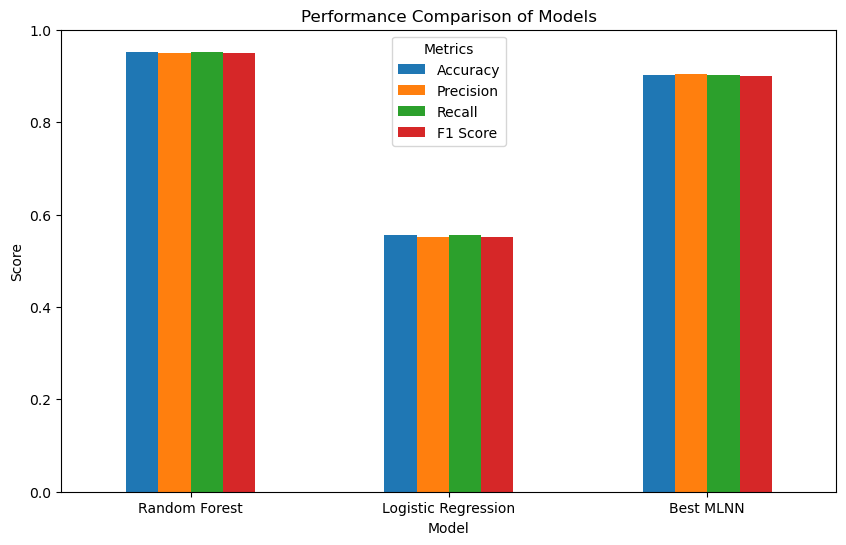

In [84]:
# Metrics to compare
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Plot the comparison
results.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Performance Comparison of Models")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(title="Metrics")
plt.xticks(rotation=0)
plt.show()

### Recommendation Engine

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

numeric_cols = ['rating', 'calories', 'protein', 'fat', 'sodium']
X = df[numerical_cols].fillna(df[numerical_cols].mean()) # Handle missing values

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# User preferences for numerical columns (e.g., rating, calories, protein, fat, sodium)
user_preferences = np.array([4.5, 300, 20, 10, 150])

# Normalize user preferences using the same scaler
user_preferences_scaled = scaler.transform(user_preferences.reshape(1, -1)).flatten()

# Hybrid recommendation function
def hybrid_recommendation(recipes, user_preferences, similarity_weight=0.7, rule_weight=0.3):
    # Compute cosine similarity scores
    similarity_scores = cosine_similarity(recipes, user_preferences.reshape(1, -1)).flatten()

    # Apply rule-based filtering (scaled penalties instead of binary 0/1)
    rule_scores = np.array([
        max(0, 1 - (max(0, row[1] - 400) / 400) - (max(0, row[4] - 200) / 200) - (max(0, row[3] - 15) / 15))
        for row in recipes
    ])

    # Ensure rule scores remain within valid range (0 to 1)
    rule_scores = np.clip(rule_scores, 0, 1)

    # Compute final weighted score
    combined_scores = similarity_weight * similarity_scores + rule_weight * rule_scores

    # Rank recipes by combined scores
    ranked_indices = np.argsort(combined_scores)[::-1]  # Sort in descending order

    # Ensure we don't select more indices than available in the dataset
    ranked_indices = ranked_indices[:min(10, len(recipes))] 

    return ranked_indices  # Return top 10 recipes

# Generate recommendations
ranked_indices = hybrid_recommendation(X_scaled, user_preferences_scaled)

# Extract recommended recipes
top_recipes = df.iloc[ranked_indices][["title", "rating", "calories", "protein", "fat", "sodium"]].reset_index(drop=True)

# Display recommendations
print("Top 10 Recommended Recipes:")
print(top_recipes)

Top 10 Recommended Recipes:
                                               title  rating  calories  \
0                    Tequila and Lime Chicken Tacos    5.000     383.0   
1                                Yorkshire Puddings    3.750     195.0   
2                         Strawberry-Soy Milk Shake    3.750     170.0   
3            Grilled Mackerel with Spicy Tomato Jam    4.375     227.0   
4       Watermelon and Cucumber Mint Tsatsiki Salad    3.750     169.0   
5                     Garlic-and-Herb-Braised Squid    4.375     221.0   
6  Broiled Salmon with Curried Eggplant Chutney a...   4.375     227.0   
7                            Spring Vegetable Sauté    5.000     287.0   
8                    Lentil Soup with Minted Yogurt    4.375     254.0   
9                   Vegetable, Rice, and Lemon Soup    3.750     180.0   

   protein   fat  sodium  
0     26.0  11.0   241.0  
1     10.0   6.0   103.0  
2     12.0   6.0    34.0  
3     17.0  12.0   157.0  
4      9.0   4.0    83